# Model
- Arima model
- Propet
- LSTM

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import io , os , time ,requests,json,bs4
from time import sleep
# import lxml.etree as xml
# import pandas_datareader as pdr
# from yahoo_finance import Share
import matplotlib.pyplot as plt
%matplotlib inline

# model
import pmdarima as pm

In [3]:
# init 
datapath = '/mnt/c/Users/poom/drive/01project/01cap_stone/04data/01stockprice'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# load data
df_final= pd.read_csv(os.path.join(datapath,'df_final2.csv'))

## ARIMA

In [4]:
# test model with 'TSLA'
df_TSLA = df_final[df_final['name'] == 'TSLA'][['Date', 'Adj Close']]
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'],format= '%Y-%m-%d')
df_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 8988 to 10485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1498 non-null   datetime64[ns]
 1   Adj Close  1498 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.1 KB


In [5]:
df_TSLA.set_index('Date',inplace=True)
df_TSLA = df_TSLA.asfreq('b')
df_TSLA.fillna(method='ffill',inplace=True)
df_TSLA.isna().sum().sum()

0

In [6]:
df_TSLA.head()

,Adj Close
Date,
2015-01-22,40.324001
2015-01-23,40.257999
2015-01-26,41.310001
2015-01-27,41.195999
2015-01-28,39.874001


In [ ]:
data_init= df_TSLA
train_len = int((data_init.shape[0] * 0.95))

y_train = data_init.iloc[:train_len]
y_test  = data_init.iloc[train_len:]

print(f"{train_len} train samples")
print(f"{data_init.shape[0] - train_len} test samples")


1473 train samples
78 test samples


In [ ]:
# model long period
# Create Model Arima แบบ Long Period
data=y_train
model = pm.auto_arima(data['Adj Close'], start_p=0, start_q=0,test='adf',# use adftest to find optimal 'd'
                      max_p=3, max_q=3,max_d=3, # maximum p and q
                      m=10,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   #Seasonality
                      start_P=0,start_Q=0, 
                      max_P=3, max_Q=3,max_D=3,
                      D=1, 
                      trace=True,
                      error_action='warn',  
                      suppress_warnings=True, 
                      stepwise=True,random_state=10,n_fits=10)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[10]             : AIC=9367.621, Time=0.48 sec
 ARIMA(1,1,0)(1,1,0)[10]             : AIC=9091.157, Time=0.70 sec
 ARIMA(0,1,1)(0,1,1)[10]             : AIC=8806.409, Time=1.07 sec
 ARIMA(0,1,1)(0,1,0)[10]             : AIC=9369.258, Time=0.25 sec
 ARIMA(0,1,1)(1,1,1)[10]             : AIC=8801.914, Time=1.23 sec
 ARIMA(0,1,1)(1,1,0)[10]             : AIC=9091.159, Time=0.74 sec
 ARIMA(0,1,1)(2,1,1)[10]             : AIC=8740.798, Time=2.34 sec
 ARIMA(0,1,1)(2,1,0)[10]             : AIC=8787.053, Time=1.70 sec
 ARIMA(0,1,1)(3,1,1)[10]             : AIC=8728.609, Time=4.79 sec
 ARIMA(0,1,1)(3,1,0)[10]             : AIC=8730.812, Time=2.55 sec
 ARIMA(0,1,1)(3,1,2)[10]             : AIC=8730.038, Time=6.37 sec
 ARIMA(0,1,1)(2,1,2)[10]             : AIC=8740.983, Time=4.14 sec
 ARIMA(0,1,0)(3,1,1)[10]             : AIC=8726.609, Time=2.64 sec
 ARIMA(0,1,0)(2,1,1)[10]             : AIC=8739.262, Time=1.38 sec
 ARIMA(0,1,0)(3,1,0

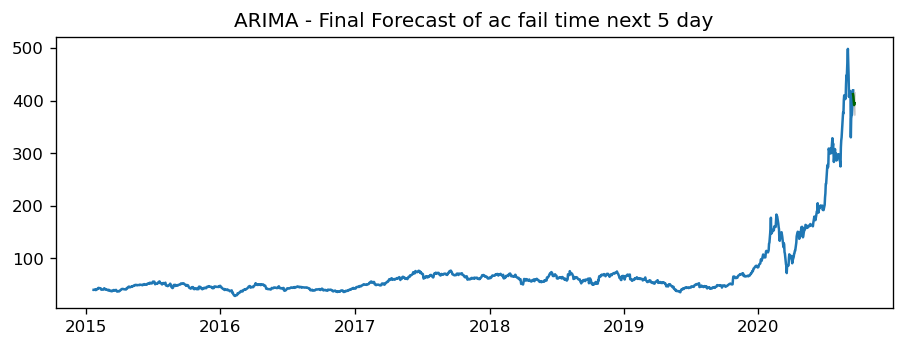

In [ ]:
#plot 
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
n_periods = 5
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='B')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Final Forecast of ac fail time next 5 day")
plt.show()

Split train test

In [ ]:
data_init = df_TSLA
train_len_a = int((data_init.shape[0] * 0.95))
train_data_a, test_data_a = data_init[:train_len_a], data_init[train_len_a:]

y_train_a = train_data_a['Adj Close'].values
y_test_a = test_data_a['Adj Close'].values

print(f"{train_len_a} train samples")
print(f"{data_init.shape[0] - train_len_a} test samples")

1473 train samples
78 test samples


In [ ]:
model.fit(y_train_a)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(3, 1, 1, 10),
      suppress_warnings=True, with_intercept=False)

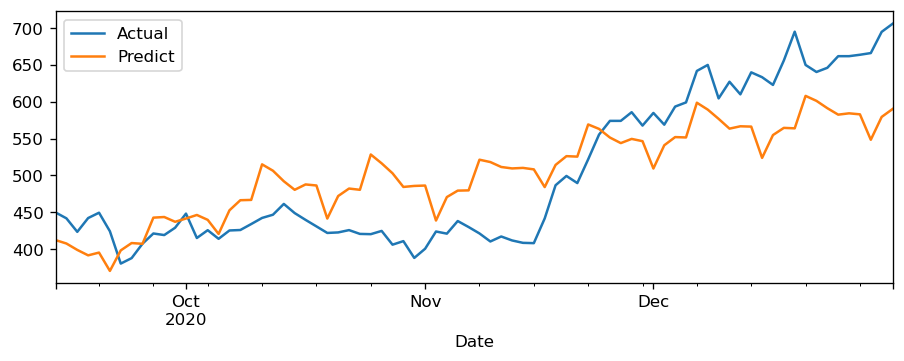

In [ ]:
future_forecast_a = model.predict(n_periods=78)
future_forecast_a = pd.DataFrame(future_forecast_a,index = test_data_a.index,columns=['Predict'])
pd.concat([test_data_a,future_forecast_a],axis=1).plot().legend(["Actual",'Predict'])

In [ ]:
#Create Function Evaluate Model
import numpy as np
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

#หาค่า Accuracy ของ Model Arima Long Period
forecast_accuracy(future_forecast_a['Predict'], y_test_a)

{'mape': 0.10966076813828504,
 'me': 2.9285763122955735,
 'mae': 54.169817796466255,
 'mpe': 0.025199882986354522,
 'rmse': 62.93528123214004,
 'corr': 0.8055609814373282,
 'minmax': 0.09999417985699444}

### We got RMSE of 62.9. Which is around 8.7% of current TSLA price ($705)

## Decrease time frame from 5 to 2 years (start data = 2019-01-01, end date = today)

In [13]:
df_final_short = df_final[df_final['name'] == 'TSLA']

df_final_short= df_final_short[df_final_short['Date']>='2019-01-01']
df_final_short=df_final_short[['Date','Adj Close']]
df_final_short['Date']=pd.to_datetime(df_final_short['Date'],format='%Y-%m-%d')
df_final_short.set_index('Date',inplace=True)
df_final_short=df_final_short.asfreq('b')
df_final_short.fillna(method='ffill',inplace=True)
df_final_short


,Adj Close
Date,
2019-01-02,62.023998
2019-01-03,60.071999
2019-01-04,63.537998
2019-01-07,66.991997
2019-01-08,67.070000
...,...
2020-12-25,661.770020
2020-12-28,663.690002
2020-12-29,665.989990


In [15]:
#Split Train Test Data Dataframe ที่เริ่มต้นที่เวลา 2019-01-01
data1_init= df_final_short
train_len = int((data1_init.shape[0] * 0.95))

y_train1 = data1_init.iloc[:train_len]
y_test1  = data1_init.iloc[train_len:]

print(f"{train_len} train samples")
print(f"{data1_init.shape[0] - train_len} test samples")


495 train samples
27 test samples


In [9]:
# Create Model Arima แบบ Short Period
import pmdarima as pm
data1= y_train1
model1 = pm.auto_arima(data1['Adj Close'], start_p=0, start_q=0,test='adf',# use adftest to find optimal 'd'
                      max_p=5, max_q=3,max_d=3, # maximum p and q
                      m=20,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   #Seasonality
                      start_P=0,start_Q=0, 
                      max_P=5, max_Q=3,max_D=3,
                      D=1, 
                      trace=True,
                      error_action='warn',  
                      suppress_warnings=True, 
                      stepwise=True,random_state=10,n_fits=10)

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[20]             : AIC=3831.956, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[20]             : AIC=3739.111, Time=1.33 sec
 ARIMA(0,1,1)(0,1,1)[20]             : AIC=inf, Time=2.43 sec
 ARIMA(1,1,0)(0,1,0)[20]             : AIC=3833.082, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[20]             : AIC=3678.021, Time=2.36 sec
 ARIMA(1,1,0)(3,1,0)[20]             : AIC=3651.901, Time=6.72 sec
 ARIMA(1,1,0)(4,1,0)[20]             : AIC=3616.804, Time=12.79 sec
 ARIMA(1,1,0)(5,1,0)[20]             : AIC=3617.268, Time=18.41 sec
 ARIMA(1,1,0)(4,1,1)[20]             : AIC=3609.262, Time=25.06 sec
 ARIMA(1,1,0)(3,1,1)[20]             : AIC=3611.658, Time=17.78 sec
 ARIMA(1,1,0)(5,1,1)[20]             : AIC=3609.257, Time=49.58 sec
 ARIMA(1,1,0)(5,1,2)[20]             : AIC=3609.935, Time=94.27 sec


In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
n_periods = 5
fitted, confint = model1.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data1.index[-1], periods = n_periods, freq='B')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data1)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Final Forecast of ac fail time next 5 day")
plt.show()

In [ ]:
data1_init= df_TSLA_short
train_len1_a = int((data1_init.shape[0] * 0.95))
train_data1_a, test_data1_a = data1_init[:train_len1_a], data1_init[train_len1_a:]

y_train1_a = train_data1_a['Adj Close'].values
y_test1_a = test_data1_a['Adj Close'].values

print(f"{train_len1_a} train samples")
print(f"{data1_init.shape[0] - train_len1_a} test samples")

In [ ]:
model1.fit(y_train1_a)

In [ ]:
future_forecast1_a = model1.predict(n_periods=23)
future_forecast1_a = pd.DataFrame(future_forecast1_a,index = test_data1_a.index,columns=['Predict'])
pd.concat([test_data1_a,future_forecast1_a],axis=1).plot().legend(["Actual",'Predict'])

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})


forecast_accuracy(future_forecast1_a['Predict'], y_test1_a)

Short time frame Data has better RMSE (123)

## Time Series modeling Facebook Prophet

### From this section move to Google colab for more demanding work

In [4]:
!pip install fbprophet

In [4]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)
# fbprophet.Prophet

Prophet 0.7.1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_final = pd.read_csv("/content/drive/My Drive/df_final2.csv")
df_final.head()

,Date,High,Low,Open,Volume,Adj Close,ema10,ema20,ema75,macd,macd_signal_line,rsi,L14,H14,%K,%D,name,COILOpen,COILHigh,COILLow,COILClose,COILAdj Close,COILVolume,DJIOpen,DJIHigh,DJILow,DJIClose,DJIAdj Close,DJIVolume,EURUSDOpen,EURUSDHigh,EURUSDLow,EURUSDClose,EURUSDAdj Close,EURUSDVolume,GOLDOpen,GOLDHigh,GOLDLow,GOLDClose,GOLDAdj Close,...,IXICAdj Close,IXICVolume,N225Open,N225High,N225Low,N225Close,N225Adj Close,N225Volume,NGFOpen,NGFHigh,NGFLow,NGFClose,NGFAdj Close,NGFVolume,NYAOpen,NYAHigh,NYALow,NYAClose,NYAAdj Close,NYAVolume,SILVEROpen,SILVERHigh,SILVERLow,SILVERClose,SILVERAdj Close,SILVERVolume,SP500Open,SP500High,SP500Low,SP500Close,SP500Adj Close,SP500Volume,USDCNYOpen,USDCNYHigh,USDCNYLow,USDCNYClose,USDCNYAdj Close,USDCNYVolume,compound,GGTrendAllTimeMonthly
0,2015-01-22,28.117500,27.430000,27.565001,215185600.0,25.597706,24.955144,25.045723,25.371346,-0.144608,-0.192319,54.163214,26.157499,28.312500,90.139232,63.747240,AAPL,47.349998,49.090000,45.869999,46.310001,46.310001,426829.0,17557.289063,17840.890625,17482.539063,17813.980469,17813.980469,111980000.0,1.161697,1.164289,1.141400,1.161535,1.161535,0.0,1293.199951,1302.099976,1283.500000,1300.699951,1300.699951,...,4750.399902,1.996550e+09,17306.640625,17355.740234,17229.210938,17329.019531,17329.019531,121900.0,3.000,3.048,2.766,2.835,2.835,169450.0,10753.580078,10869.000000,10699.730469,10859.349609,10859.349609,4.176050e+09,18.346001,18.346001,18.346001,18.346001,18.346001,0.0,2034.300049,2064.620117,2026.380005,2063.149902,2063.149902,4.176050e+09,6.2017,6.2020,6.1986,6.2017,6.2017,0.0,0.0,0.0
1,2015-01-23,28.437500,27.882500,28.075001,185859200.0,25.729790,25.095989,25.110872,25.380778,-0.072844,-0.168424,57.671228,26.157499,28.437500,91.557057,79.590968,AAPL,46.630001,47.759998,45.209999,45.590000,45.590000,374289.0,17812.500000,17812.500000,17667.529297,17672.599609,17672.599609,97110000.0,1.134649,1.137398,1.112180,1.134675,1.134675,0.0,1299.800049,1299.800049,1292.599976,1292.599976,1292.599976,...,4757.879883,1.653830e+09,17520.630859,17532.060547,17460.759766,17511.750000,17511.750000,132500.0,2.858,2.994,2.855,2.986,2.986,99068.0,10854.230469,10854.230469,10784.570313,10788.330078,10788.330078,3.573560e+09,18.315001,18.355000,18.284000,18.284000,18.284000,20.0,2062.979980,2062.979980,2050.540039,2051.820068,2051.820068,3.573560e+09,6.1990,6.2179,6.1990,6.1990,6.1990,0.0,0.0,0.0
2,2015-01-26,28.590000,28.200001,28.434999,222460000.0,25.757124,25.216195,25.172420,25.390682,-0.013608,-0.137461,66.442618,26.157499,28.590000,87.050342,89.582210,AAPL,45.200001,46.410000,44.349998,45.150002,45.150002,310638.0,17668.109375,17696.359375,17567.599609,17678.699219,17678.699219,87220000.0,1.114082,1.128399,1.114082,1.112545,1.112545,0.0,1289.500000,1290.599976,1279.400024,1279.400024,1279.400024,...,4771.759766,1.717510e+09,17285.710938,17471.939453,17285.710938,17468.519531,17468.519531,111600.0,2.897,2.955,2.841,2.881,2.881,62580.0,10787.299805,10848.040039,10748.730469,10847.150391,10847.150391,3.465760e+09,17.966999,17.966999,17.966999,17.966999,17.966999,0.0,2050.419922,2057.620117,2040.969971,2057.090088,2057.090088,3.465760e+09,6.2179,6.2458,6.2179,6.2179,6.2179,0.0,0.0,0.0
3,2015-01-27,28.120001,27.257500,28.105000,382274800.0,24.855284,25.150575,25.142216,25.376593,-0.038984,-0.117766,55.811122,26.299999,28.590000,43.013110,73.873503,AAPL,45.130001,46.549999,44.810001,46.230000,46.230000,313141.0,17638.529297,17638.529297,17288.310547,17387.210938,17387.210938,135940000.0,1.125100,1.142000,1.122600,1.124771,1.124771,0.0,1277.199951,1291.699951,1277.199951,1291.699951,1291.699951,...,4681.500000,1.954160e+09,17649.400391,17768.410156,17633.470703,17768.300781,17768.300781,139700.0,2.895,3.005,2.888,2.981,2.981,55623.0,10793.040039,10830.200195,10718.849609,10781.830078,10781.830078,3.329810e+09,18.110001,18.110001,18.068001,18.068001,18.068001,10.0,2047.859985,2047.859985,2019.910034,2029.550049,2029.550049,3.329810e+09,6.2458,6.2458,6.2351,6.2458,6.2